In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import model_based_agent as mba
import tab_agents as tab

In [2]:
'''
At the end of this script, there will be files in a timestamped folder:
1. Saved trajectory combined with old ('..total.pkl')
2. Saved individual trajectory files ('..eval_start.pkl', '..[ep].pkl')
3. Averaged agent from each each full worm episode ('..[ep]_agent.pkl')

In folder from 12_01_dropoutmodel/Data:
18-12-13-31 was a failed debugging trial
18-12-13-49 empty plate debugging trial
18-12-15-00 worm run from nogap_traj_df.pkl
18-12-16-39 continuation of 15-00 above

In folder 12_19_realworms/Data:
First three are trials; last three are init collection
19-12-18-26 test run w 50-step eps
19-12-18-40 ''
19-12-18-50 ''
20-12-14-25
20-12-14-28
20-12-14-58
'''
fbase0 = './../12_01_dropoutmodel/Data/'
fbase1 = './../12_19_realworms/Data/'


In [3]:
trial = 'Reals18-12-15-00/realworm_'
with open(fbase0+trial+'total_params.pkl','rb') as f:
    pars = pickle.load(f)
with open(fbase0+trial+'1_agent.pkl','rb') as f:
    agt0 = pickle.load(f)
with open(fbase0+trial+'5_agent.pkl','rb') as f:
    agt1 = pickle.load(f)
with open(fbase0+trial+'5.pkl','rb') as f:
    traj = pickle.load(f)

In [73]:
print(len(traj['reward']))
print(pars)

1200
{'reward_ahead': 10, 'timestep_gap': 1, 'prev_act_window': 3, 'jump_limit': 100}


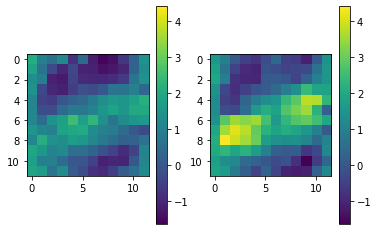

In [4]:
fig,ax = plt.subplots(1,2)
agt = agt0
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

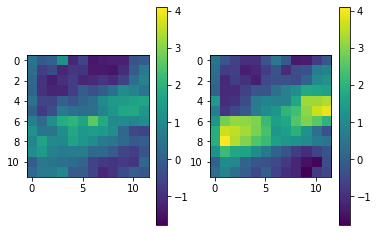

In [5]:
fig,ax = plt.subplots(1,2)
agt = agt1
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

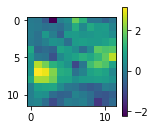

In [6]:
plt.figure(figsize=(2,2))
plt.imshow((agt.Qtab[:,1]-agt.Qtab[:,0]).reshape(12,12))
plt.colorbar();

In [10]:
dict_names = [
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
]
dict_names = ['./../10_30_model/'+dn for dn in dict_names]

dh = mba.DataHandler()
dh.add_dict_to_df(dict_names, 
                 reward_ahead=1,
                 timestep_gap=1,
                 prev_act_window=1,
                 jump_limit=100)
dh.save_dfs('noprocs.pkl')

In [2]:
dh = mba.DataHandler()
dh.load_df('noprocs.pkl')

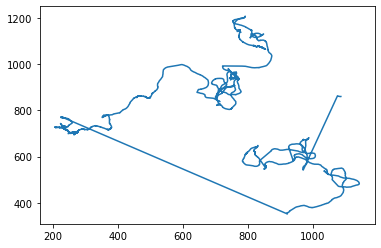

In [3]:
locs = np.zeros((9798,2))
for i in range(9798):
    locs[i,:] = dh.df['loc'][i]
plt.plot(locs[:,0],locs[:,1])

In [16]:
agt = tab.Q_Alpha_Agent(
    gamma=.5,
    epsilon=0.05,
    alpha=0.005,)
lnr = mba.Learner(agt,'noprocs',
                 worm_pars={'num_models':10,'frac':.5},
                 num_steps=1000,
                 eval_steps=1000)
lnr.make_mod_and_env(dh)
eval_r = lnr.eval_ep()

On model 0
On model 1
On model 2
On model 3
On model 4
On model 5
On model 6
On model 7
On model 8
On model 9


In [17]:
np.mean(eval_r)

0.08786076035351223

In [18]:
evals = []
for i in range(10):
    print(i)
    Qtab = lnr.learn(dh,learn_limit=1000)
    evals.append(np.mean(lnr.eval_ep()))

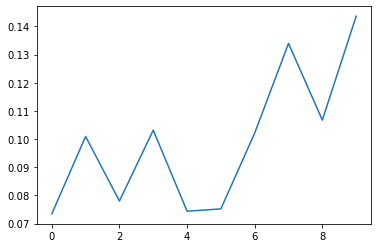

In [19]:
plt.plot(evals)

What am I trying to do right now? 
Want to know if ensembles help at all. 
To test this, train agents separately on models.
Want to know how reward_ahead and prev_act_window affect learning.
Also how amount of data changes results. 
The output I'd want is 